In [29]:
"""
决策树
优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，
可以处理不相关特征数据。
缺点：可能会产生过度匹配问题。
适用数据类型：数值型和标称型。
"""

# 当前数据集上哪个特征在划分数据分类时起决定性作用。为了找到决定性的特征，划分出最好的结果

"""
决策树的一般流程
1. 收集数据：可以使用任何方法。
2. 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须
离散化。
3. 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图
形是否符合预期。
4. 训练算法：构造树的数据结构。
5. 测试算法：使用经验树计算错误率。
6. 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可
以更好地理解数据的内在含义。
"""

"""
在划分数据集之前之后信息发生的变化称为信息增益，知道如何计算信息
增益，我们就可以计算每个特征值划分数据集获得的信息增益，获得信息
增益最高的特征就是最好的选择。
"""
from math import log

def calcShannonEnt(dataSet):
    """
    计算给定数据集的信息熵（香农熵）
    参数:
        dataSet: 数据集，最后一列是分类标签
    返回:
        该数据集的信息熵
    """
    
    # 获取数据集中的样本数量
    numEntries = len(dataSet)
    
    # 创建一个空字典，用于统计每个分类标签出现的次数
    labelCounts = {}
    
    # 遍历数据集中的每个样本
    for featVec in dataSet:
        # 获取当前样本的分类标签（最后一列）
        currentLabel = featVec[-1]
        
        # 如果该分类标签不在字典中，则初始化为0
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        
        # 对该分类标签的计数加1
        labelCounts[currentLabel] += 1
    
    # 初始化信息熵为0.0
    shannoEnt = 0.0
    
    # 遍历每个分类标签，计算信息熵
    for key in labelCounts:
        # 计算当前分类标签出现的概率
        prob = float(labelCounts[key]) / numEntries
        
        # 累加计算信息熵（使用对数以2为底）
        shannoEnt -= prob * log(prob, 2)
    
    # 返回最终计算的信息熵
    return shannoEnt

In [2]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
                [1, 1, 'yes'],
                [1, 0, 'no'],
                [0, 1, 'no'],
                [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

In [28]:
myDat, labels = createDataSet()

In [4]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [5]:
calcShannonEnt(myDat)

0.9709505944546686

In [6]:
myDat[0][-1] = 'maybe'

In [7]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [8]:
calcShannonEnt(myDat)

1.3709505944546687

In [31]:
"""
另一个度量集合无序程度的方法是基尼不纯度2 （Gini impurity），简单地
说就是从一个数据集中随机选取子项，度量其被错误分类到其他分组里的
概率


- 划分数据集
分类算法除了需要测量信息
熵，还需要划分数据集，度量划分数据集的熵，以便判断当前是否正确地
划分了数据集。我们将对每个特征划分数据集的结果计算一次信息熵，然
后判断按照哪个特征划分数据集是最好的划分方式。想象一个分布在二维
空间的数据散点图，需要在数据之间划条线，将它们分成两部分
"""
def splitDataSet(dataSet, axis, value):
    """
    按照给定特征（axis）和特征值（value）划分数据集
    参数:
        dataSet: 待划分的数据集（二维列表）
        axis: 划分依据的特征列索引（从0开始）
        value: 需要保留的特征值
    返回:
        划分后的子数据集（不包含axis列）
    """
    
    # 初始化返回的子数据集
    retDataSet = []
    
    # 遍历数据集中的每个样本
    for featVec in dataSet:
        # 检查当前样本的axis列是否等于目标特征值
        if featVec[axis] == value:
            # 复制axis列之前的所有特征（切片操作）
            reducedFeatVec = featVec[:axis]
            
            # 扩展axis列之后的所有特征（跳过axis列）
            reducedFeatVec.extend(featVec[axis+1:])
            
            # 将处理后的样本添加到子数据集
            retDataSet.append(reducedFeatVec)
    
    # 返回划分后的子数据集
    return retDataSet


In [16]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [14]:
splitDataSet(myDat,0,1)  # 去除第0列， 保留第0列值为1的数据

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [15]:
splitDataSet(myDat, 0,0) # 去除第0列， 保留第0列值为0的数据

[[1, 'no'], [1, 'no']]

In [28]:
def chooseBestFeatureToSplit(dataSet):
    """
    选择最优特征进行数据集划分（基于信息增益）
    参数:
        dataSet: 数据集（二维列表），最后一列是分类标签
    返回:
        信息增益最大的特征索引（int）
    """
    
    # 计算特征数量（减去最后一列的分类标签）
    numFeatures = len(dataSet[0]) - 1
    
    # 计算整个数据集的基础信息熵（用于后续信息增益计算）
    baseEntropy = calcShannonEnt(dataSet)
    
    # 初始化最佳信息增益和最佳特征索引
    bestInfoGain = 0.0
    bestFeature = -1  # 默认值-1表示无效索引
    
    # 遍历每个特征
    for i in range(numFeatures):
        # 获取当前特征列的所有值
        featList = [example[i] for example in dataSet]
        
        # 去重，得到当前特征的唯一取值集合
        uniqueVals = set(featList)
        
        # 初始化按当前特征划分后的条件熵
        newEntropy = 0.0
        
        # 计算按当前特征划分后的条件熵
        for value in uniqueVals:
            # 划分子数据集（保留当前特征值为value的样本，并移除当前特征列）
            subDataSet = splitDataSet(dataSet, i, value)
            
            # 计算子数据集占比概率
            prob = len(subDataSet) / float(len(dataSet))
            
            # 累加计算条件熵
            newEntropy += prob * calcShannonEnt(subDataSet)
        
        # 计算当前特征的信息增益 = 基础熵 - 条件熵
        infoGain = baseEntropy - newEntropy
        
        # 更新最佳特征（选择信息增益最大的特征）
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    
    # 返回最佳特征索引
    return bestFeature

In [26]:
chooseBestFeatureToSplit(myDat)

0

In [19]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [29]:
labels

['no surfacing', 'flippers']

In [23]:
# 3.1.3 递归构建决策树
"""
程序遍历完所有划分数据集的属性，或者每个分支下
的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一
个叶子节点或者终止块。任何到达叶子节点的数据必然属于叶子节点的分
类
"""
def majorityCnt(classList):
    """
    统计分类标签列表中出现次数最多的类别（多数表决）
    
    参数:
        classList: 包含分类标签的列表（如 ['A', 'B', 'A', 'C']）
        
    返回:
        出现次数最多的类别标签（如 'A'）
    """
    
    # 初始化空字典，用于统计每个类别的出现次数
    classCount = {}
    
    # 遍历类别列表，统计频次
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0  # 初始化新类别的计数器
        classCount[vote] += 1     # 当前类别计数加1
    
    # 使用匿名函数 lambda 替代 operator.itemgetter
    # 按字典的值（出现次数）降序排序
    sortedClassCount = sorted(
        classCount.items(),        # 获取 (key, value) 元组列表
        key=lambda x: x[1],        # 按元组的第二个元素（value）排序
        reverse=True               # 降序排列
    )
    
    # 返回出现次数最多的类别（排序后第一个元组的 key）
    return sortedClassCount[0][0]

def createTree(dataSet, labels):
    """
    递归构建决策树
    参数:
        dataSet: 训练数据集（二维列表），最后一列是分类标签
        labels: 特征名称列表（与dataSet列对应）
    返回:
        决策树（嵌套字典结构）
    """
    
    # 获取数据集中所有样本的分类标签
    classList = [example[-1] for example in dataSet]
    
    # 终止条件1：如果所有样本属于同一类别，直接返回该类别
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    
    # 终止条件2：如果所有特征已用完，返回出现次数最多的类别
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    # 选择最优划分特征的索引
    bestFeat = chooseBestFeatureToSplit(dataSet)
    
    # 获取最优特征的名称
    bestFeatLabel = labels[bestFeat]
    
    # 初始化决策树（以当前最优特征为根节点）
    myTree = {bestFeatLabel: {}}
    
    # 从labels列表中移除已使用的特征（避免后续重复使用）
    del(labels[bestFeat])
    
    # 获取当前最优特征的所有取值
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    
    # 递归构建子树
    for value in uniqueVals:
        # 复制剩余的标签列表（避免修改原始labels）
        subLabels = labels[:]
        
        # 递归调用：对每个特征值划分的子数据集构建子树
        myTree[bestFeatLabel][value] = createTree(
            splitDataSet(dataSet, bestFeat, value),  # 划分子集
            subLabels                                 # 剩余特征标签
        )
    
    # 返回构建完成的决策树
    return myTree

In [31]:
myTree = createTree(myDat,labels)

In [32]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [38]:
# 3.2 在Python中使用Matplotlib注解绘制树形图

import matplotlib.pyplot as plt

# ❶ 定义文本框和箭头格式的样式字典
decisionNode = dict(boxstyle="sawtooth", fc="0.8")  # 决策节点样式：锯齿形边框，浅灰色填充
leafNode = dict(boxstyle="round4", fc="0.8")        # 叶节点样式：圆角边框，浅灰色填充
arrow_args = dict(arrowstyle="<-")                  # 箭头样式：普通箭头

# ❷ 绘制带箭头的注解（节点连接线）
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    """
    绘制一个决策树节点（带箭头和文本框）
    参数:
        nodeTxt: 节点显示的文本
        centerPt: 节点中心坐标（子节点位置）
        parentPt: 父节点坐标（箭头起点）
        nodeType: 节点样式（decisionNode或leafNode）
    """
    createPlot.ax1.annotate(
        nodeTxt, 
        xy=parentPt,                      # 箭头起点坐标
        xycoords='axes fraction',         # 坐标使用轴比例（0~1）
        xytext=centerPt,                  # 文本位置（子节点坐标）
        textcoords='axes fraction',       # 文本坐标使用轴比例
        va="center",                      # 文本垂直居中
        ha="center",                      # 文本水平居中
        bbox=nodeType,                    # 文本框样式
        arrowprops=arrow_args             # 箭头样式
    )

def createPlot():
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
    plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
    """创建并显示一个简单的决策树示例图"""
    fig = plt.figure(1, facecolor='white')  # 创建图形，背景白色
    fig.clf()                              # 清空图形
    
    # 创建子图（111表示1行1列的第1个图）
    createPlot.ax1 = plt.subplot(111, frameon=False)  # 无边框
    
    # 绘制决策节点（从(0.1,0.5)指向(0.5,0.1)）
    plotNode('决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    
    # 绘制叶节点（从(0.3,0.8)指向(0.8,0.1)）
    plotNode('叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    
    plt.show()  # 显示图形

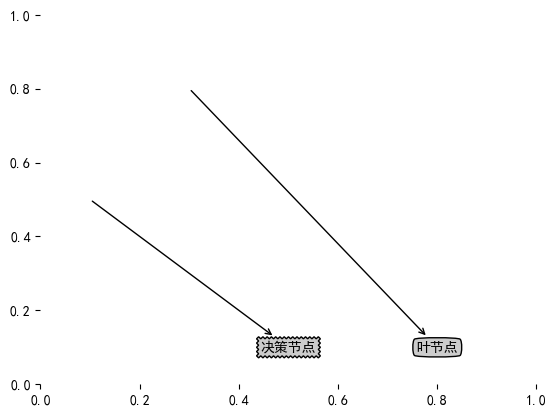

In [42]:
createPlot()

In [42]:
def getNumLeafs(myTree):
    """
    递归计算决策树的叶子节点数量
    
    参数:
        myTree: 决策树（嵌套字典结构，如 {'feature': {0: 'A', 1: {'feature2': ...}}})
        
    返回:
        叶子节点的总数
    """
    numLeafs = 0
    firstStr = next(iter(myTree))  # Python 3 兼容：获取第一个键（特征名）
    secondDict = myTree[firstStr]  # 获取子字典
    
    for key in secondDict.keys():
        # 如果子节点是字典类型，递归调用
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1  # 当前节点是叶子节点
    return numLeafs


def getTreeDepth(myTree):
    """
    递归计算决策树的最大深度
    
    参数:
        myTree: 决策树（嵌套字典结构）
        
    返回:
        树的最大深度（从根节点到最远叶子节点的层数）
    """
    maxDepth = 0
    firstStr = next(iter(myTree))  # 获取第一个键（特征名）
    secondDict = myTree[firstStr]  # 获取子字典
    
    for key in secondDict.keys():
        # 如果子节点是字典类型，递归计算深度
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1  # 当前节点是叶子节点
        
        # 更新最大深度
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [7]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': \
                                    {0: 'no', 1: 'yes'}}}},
                                     {'no surfacing': {0: 'no', 1: {'flippers': \
                                    {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                                     ]
    return listOfTrees[i]

In [45]:
myTree = retrieveTree(0)

In [46]:
getNumLeafs(myTree)

3

In [47]:
getTreeDepth(myTree)

2

In [40]:
import matplotlib.pyplot as plt

# 定义节点样式（与之前代码保持一致）
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotMidText(cntrPt, parentPt, txtString):
    """
    在父子节点之间的连线上绘制文本（如属性值）
    
    参数:
        cntrPt:  子节点坐标
        parentPt: 父节点坐标
        txtString: 要显示的文本
    """
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]  # 计算中点x坐标
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]  # 计算中点y坐标
    createPlot.ax1.text(xMid, yMid, txtString, 
                       va="center", ha="center", 
                       rotation=30)  # 文本旋转30度

def plotTree(myTree, parentPt, nodeTxt):
    """
    递归绘制决策树
    
    参数:
        myTree: 决策树（字典结构）
        parentPt: 父节点坐标
        nodeTxt: 节点显示的文本（如属性值）
    """
    # ❶ 计算当前树的叶子节点数和深度
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    
    # 获取当前节点的特征名（字典的第一个键）
    firstStr = next(iter(myTree))  
    
    # 计算当前节点的绘制坐标
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, 
              plotTree.yOff)
    
    # ❷ 在父子节点之间绘制文本（如"是/否"）
    plotMidText(cntrPt, parentPt, nodeTxt)
    
    # 绘制当前节点（决策节点）
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    
    secondDict = myTree[firstStr]  # 获取子节点字典
    
    # ❸ 减少y偏移量（准备绘制子节点）
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    
    # 遍历所有子节点
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            # 递归绘制子树
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # ❹ 增加x偏移量（绘制叶子节点）
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), 
                    cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    
    # 恢复y偏移量（回溯到父节点层级）
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

def createPlot(inTree):
    """
    初始化并绘制决策树
    
    参数:
        inTree: 决策树（字典结构）
    """
    fig = plt.figure(1, facecolor='white')
    fig.clf()  # 清空画布
    
    # 设置坐标轴不可见
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    
    # 初始化全局变量
    plotTree.totalW = float(getNumLeafs(inTree))  # 树的宽度（叶子节点数）
    plotTree.totalD = float(getTreeDepth(inTree)) # 树的深度
    plotTree.xOff = -0.5 / plotTree.totalW       # x偏移初始值（居中调整）
    plotTree.yOff = 1.0                          # y偏移初始值（顶部开始）
    
    # 从根节点开始绘制
    plotTree(inTree, (0.5, 1.0), '')  # 根节点坐标为(0.5, 1.0)
    
    plt.show()

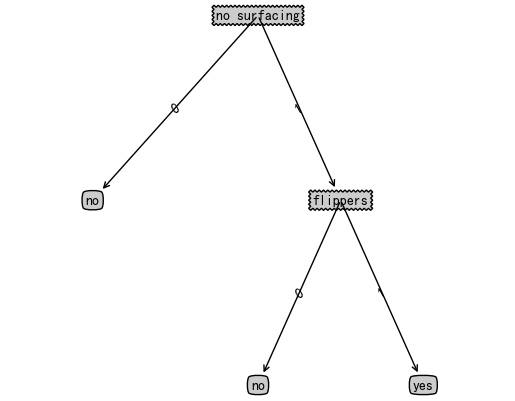

In [49]:
createPlot(myTree)

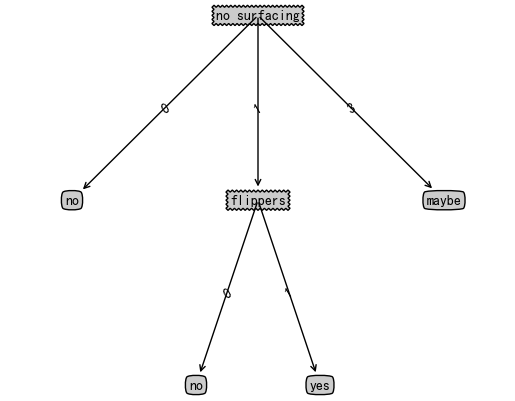

In [50]:
myTree['no surfacing'][3]='maybe'
createPlot(myTree)

In [51]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

In [1]:
# 3.3 测试和存储分类器
"""
依靠训练数据构造了决策树之后，我们可以将它用于实际数据的分类。在
执行数据分类时，需要决策树以及用于构造树的标签向量。
程序比较测试数据与决策树上的数值，递归执行该过程直到进入叶子节点；最后
将测试数据定义为叶子节点所属的类型。
"""
def classify(inputTree, featLabels, testVec):
    """
    使用决策树对测试数据进行分类
    
    参数:
        inputTree: 训练好的决策树（嵌套字典结构）
        featLabels: 特征标签列表（如 ['feature1', 'feature2']）
        testVec: 测试数据特征值列表（如 [1, 0]）
        
    返回:
        classLabel: 分类结果（字符串或数值）
    """
    # 获取当前节点的特征名（决策树的第一个键）
    firstStr = next(iter(inputTree))  # Python 3 兼容写法
    secondDict = inputTree[firstStr]  # 获取子节点字典
    
    # ❶ 将特征名转换为特征在测试数据中的索引位置
    featIndex = featLabels.index(firstStr)
    
    # 遍历当前特征的所有可能取值
    for key in secondDict.keys():
        # 如果测试数据的特征值等于当前分支的键
        if testVec[featIndex] == key:
            # 如果子节点是字典类型，递归进入下一层决策
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            # 否则到达叶子节点，返回分类结果
            else:
                classLabel = secondDict[key]
            return classLabel  # 返回最终的分类标签

In [4]:
myDat,labels=createDataSet()

In [5]:
labels

['no surfacing', 'flippers']

In [6]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [8]:
myTree=retrieveTree (0)

In [9]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [10]:
classify(myTree, labels, [1, 0])

'no'

In [11]:
classify(myTree, labels, [1, 1])

'yes'

In [12]:
# 决策树的存储
def storeTree(inputTree, filename):
    """
    将决策树对象序列化并保存到指定文件中（使用 pickle 模块）
    
    参数:
        inputTree: 要保存的树结构对象（通常是字典或自定义树类实例）
        filename:  保存文件的路径和名称（字符串）
    """
    import pickle  # 导入 pickle 模块，用于对象的序列化（把内存中的对象转成字节流保存到文件）

    fw = open(filename, 'wb')  # 以二进制写入模式打开文件（注意：pickle 在 Python3 中必须用 'wb'，不能用 'w'）
                               # 'w' 是文本模式，在 Python3 中会导致 TypeError

    pickle.dump(inputTree, fw) # 使用 pickle 将 inputTree 对象序列化并写入文件 fw

    fw.close()                 # 关闭文件，释放资源

def grabTree(filename):
    """
    从指定文件中加载（反序列化）之前保存的决策树对象（使用 pickle 模块）
    
    参数:
        filename: 要读取的文件路径（字符串）
    
    返回:
        从文件中恢复的树对象
    """
    import pickle

    with open(filename, 'rb') as fr:  # 自动管理文件资源，更安全
        return pickle.load(fr)        # 直接返回加载的对象

In [13]:
storeTree(myTree, 'classifierStorage.txt')

In [14]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [20]:
# 使用决策树预测隐形眼镜类型

import numpy as np

# 读取 semeion.data
data_path = 'jupyterDir/lenses.data'
data = np.loadtxt(data_path, usecols=range(1, 6))

print("特征数据形状:", data.shape)

特征数据形状: (24, 5)


In [17]:
data[0]

array([1., 1., 1., 1., 1., 3.])

In [18]:
data[1, :]

array([2., 1., 1., 1., 2., 2.])

In [25]:
import matplotlib.pyplot as plt

   age  spectacle  astigmatic  tear  class
0  1.0        1.0         1.0   1.0    3.0
1  1.0        1.0         1.0   2.0    2.0
2  1.0        1.0         2.0   1.0    3.0
3  1.0        1.0         2.0   2.0    1.0
4  1.0        2.0         1.0   1.0    3.0


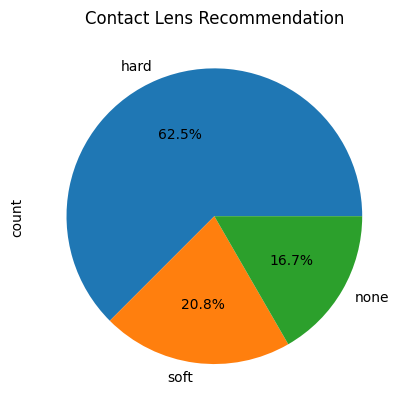

In [49]:
import pandas as pd
# 转换为DataFrame（可选）
df = pd.DataFrame(data, columns=['age', 'spectacle', 'astigmatic', 'tear', 'class'])
print(df.head())

# 可视化类别分布
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                labels=['hard', 'soft', 'none'])
plt.title('Contact Lens Recommendation')
plt.show()

In [50]:
# 将数值标签转为文本（可选）
df['class'] = df['class'].map({1: 'hard', 2: 'soft', 3: 'no lenses'})
df['age'] = df['age'].map({1: 'young', 2: 'pre-presbyopic', 3: 'presbyopic'})
df['spectacle'] = df['spectacle'].map({1: 'myope', 2: 'hypermetrope'})
df['astigmatic'] = df['astigmatic'].map({1: 'no', 2: 'yes'})
df['tear'] = df['tear'].map({1: 'reduced', 2: 'normal'})
df

,age,spectacle,astigmatic,tear,class
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,no lenses
5,young,hypermetrope,no,normal,soft
6,young,hypermetrope,yes,reduced,no lenses
7,young,hypermetrope,yes,normal,hard
8,pre-presbyopic,myope,no,reduced,no lenses
9,pre-presbyopic,myope,no,normal,soft


In [51]:
lensesLabels=['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(df.to_numpy().tolist(),lensesLabels)

In [52]:
lensesTree

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard',
      'hypermetrope': {'age': {'young': 'hard',
        'pre-presbyopic': 'no lenses',
        'presbyopic': 'no lenses'}}}},
    'no': {'age': {'young': 'soft',
      'pre-presbyopic': 'soft',
      'presbyopic': {'prescript': {'myope': 'no lenses',
        'hypermetrope': 'soft'}}}}}}}}

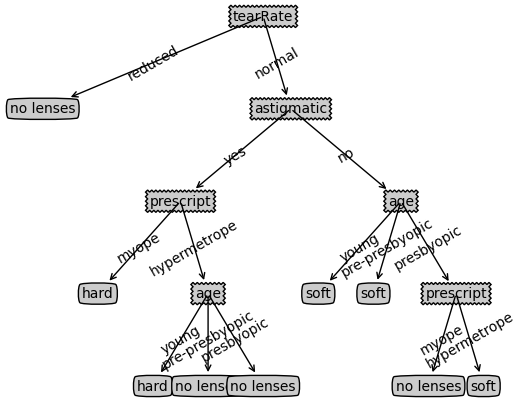

In [53]:
createPlot(lensesTree)

In [ ]:
"""
ID3算法无法直接处理数值型数据，尽管我们
可以通过量化的方法将数值型数据转化为标称型数值，但是如果存在太多
的特征划分，ID3算法仍然会面临其他问题。
为了减少过度匹配问
题，我们可以裁剪决策树，去掉一些不必要的叶子节点。如果叶子节点只
能增加少许信息，则可以删除该节点，将它并入到其他叶子节点中。
"""